In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os,cv2
from tensorflow.keras import layers
from typing import List

import tensorflow_datasets as tfds
import tensorflow_hub as hub
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [3]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Retina_Data/Copy of retina1_trainvalid.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Retina_Data')

In [4]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Retina_Data/Copy of retina1_test.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Retina_Data')

In [3]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/Retina_Data/labels_trainvalid.txt')

In [4]:
train=train.astype(str)

In [5]:
train.reset_index(inplace=True)
train

,index,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1173,1173,1
1174,1174,1
1175,1175,1
1176,1176,1


In [6]:
train.columns=['images','labels']

In [7]:
train=train.astype(str)
train.dtypes

images    object
labels    object
dtype: object

In [8]:
def fun(x):
  if len(x)==2:
    return f'00{x}.jpg'
  if len(x)==3:
    return f'0{x}.jpg'
  if len(x)==4:
    return f'{x}.jpg'
  if len(x)==1:
    return f'000{x}.jpg'
train['images']=train['images'].apply(fun)
train

,images,labels
0,0000.jpg,0
1,0001.jpg,0
2,0002.jpg,0
3,0003.jpg,0
4,0004.jpg,0
...,...,...
1173,1173.jpg,1
1174,1174.jpg,1
1175,1175.jpg,1
1176,1176.jpg,1


In [9]:
train['labels'].value_counts()

0    634
1    544
Name: labels, dtype: int64

In [11]:
len(os.listdir('/content/drive/MyDrive/Retina_Data/trainvalid'))

1179

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2) 

train_generator = train_datagen.flow_from_dataframe(
    train,
    '/content/drive/MyDrive/Retina_Data/trainvalid',
    x_col='images',
    y_col='labels',
     target_size=(128, 128),
    shuffle=True,
    seed=10,
    batch_size=32,
    subset='training',
    class_mode='categorical') 

validation_generator = train_datagen.flow_from_dataframe(
    train,
    '/content/drive/MyDrive/Retina_Data/trainvalid',
    x_col='images',
    y_col='labels',
    target_size=(128, 128),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    seed=10,
    subset='validation') 


Found 910 validated image filenames belonging to 2 classes.
Found 227 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:991: UserWarning: Found 41 invalid image filename(s) in x_col="images". These filename(s) will be ignored.
  n_invalid, x_col))


## Model Training

In [53]:
Incp=tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top = False, weights= 'imagenet',input_shape=(128,128,3))
Incp.trainable=False

In [54]:
Inc_features=Incp.output
Flat_1=keras.layers.Flatten()(Inc_features)
d1_1=keras.layers.Dense(256,activation='relu')(Flat_1)
Output1=keras.layers.Dense(2,activation='sigmoid',name='output1')(d1_1)
MODEL=keras.models.Model([Incp.input],[Output1])
MODEL.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  
              loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(),keras.metrics.Recall(),keras.metrics.Precision()])
hist=MODEL.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
29/29 [==============================] - 152s 4s/step - loss: 1.5385 - categorical_accuracy: 0.7440 - recall_12: 0.7209 - precision_12: 0.7463 - val_loss: 1.1792 - val_categorical_accuracy: 0.5991 - val_recall_12: 0.5110 - val_precision_12: 0.6591
Epoch 2/10
29/29 [==============================] - 95s 3s/step - loss: 0.3468 - categorical_accuracy: 0.8516 - recall_12: 0.6868 - precision_12: 0.9032 - val_loss: 0.3394 - val_categorical_accuracy: 0.8502 - val_recall_12: 0.5330 - val_precision_12: 0.9680
Epoch 3/10
29/29 [==============================] - 106s 4s/step - loss: 0.2872 - categorical_accuracy: 0.8670 - recall_12: 0.6176 - precision_12: 0.9590 - val_loss: 0.5743 - val_categorical_accuracy: 0.7445 - val_recall_12: 0.4626 - val_precision_12: 0.9459
Epoch 4/10
29/29 [==============================] - 94s 3s/step - loss: 0.2743 - categorical_accuracy: 0.8813 - recall_12: 0.6484 - precision_12: 0.9562 - val_loss: 0.4294 - val_categorical_accuracy: 0.8062 - val_recall_12: 

In [77]:
MODEL.save('/content/drive/MyDrive/Retina_Data/Micheal_Model.h5')

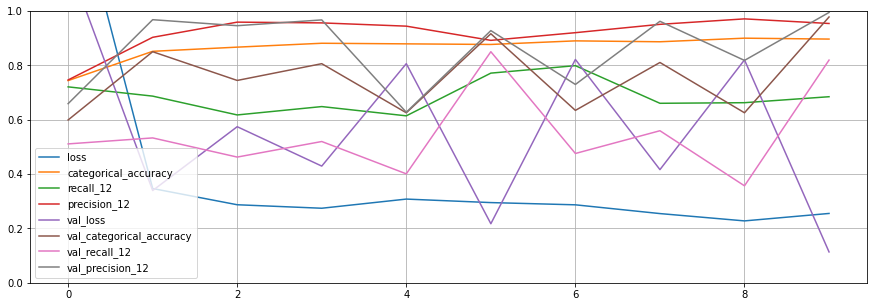

In [55]:
plt.rcParams['figure.figsize']=(15,5)
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [72]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Retina_Data/test_big',
    target_size=(128, 128),
    shuffle=True,
    seed=10,
    batch_size=32,
    subset='training',
    class_mode='categorical') 

Found 0 images belonging to 0 classes.


In [ ]:
test_generator.class_indices.keys()

In [ ]:
MODEL.predict(test_generator)

In [73]:
Store=[]
for img in os.listdir('/content/drive/MyDrive/Retina_Data/test_big'):
  image=cv2.imread(f'/content/drive/MyDrive/Retina_Data/test_big/{img}')/255.0
  image=cv2.resize(image,(128,128))
  preds=MODEL.predict(image.reshape((1,128,128,3)))
  print(preds)
  preds=np.argmax(preds,axis=1)[0]
  Store.append((img,preds))
Store=np.array(Store)

1/1 [==============================] - 3s 3s/step
[[0.94937646 0.10042989]]
1/1 [==============================] - 0s 45ms/step
[[0.85218567 0.12847482]]
1/1 [==============================] - 0s 41ms/step
[[0.9735423  0.04736248]]
1/1 [==============================] - 0s 38ms/step
[[0.8659413  0.15004817]]
1/1 [==============================] - 0s 42ms/step
[[0.97899127 0.04908495]]
1/1 [==============================] - 0s 40ms/step
[[0.86955047 0.16468723]]
1/1 [==============================] - 0s 41ms/step
[[0.9890421  0.00512874]]
1/1 [==============================] - 0s 39ms/step
[[0.6034708  0.25541654]]
1/1 [==============================] - 0s 39ms/step
[[0.7740892  0.14416099]]
1/1 [==============================] - 0s 39ms/step
[[0.910009   0.14015633]]
1/1 [==============================] - 0s 45ms/step
[[0.939076   0.12541692]]
1/1 [==============================] - 0s 42ms/step
[[0.87290215 0.18566053]]
1/1 [==============================] - 0s 38ms/step
[[0.9405367  0

In [74]:
data=pd.DataFrame({
    'images':Store[:,0],
    'labels':Store[:,1]
})
data.head()

,images,labels
0,0001.jpg,0
1,0003.jpg,0
2,0004.jpg,0
3,0005.jpg,0
4,0006.jpg,0


In [75]:
data.to_csv(r'/content/drive/MyDrive/Retina_Data/Micheal_Mishra_Text.txt', header=None, index=None, sep=' ', mode='a')


In [78]:
data['labels'].value_counts()

0    43
1    24
Name: labels, dtype: int64

## Eng